In [1]:
from numpy.random import default_rng         #  numpy randon number generator routines
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
#-------------------- The simulator, Create Ref-BM paths using EM  --------------------
def path_sim( X0, n, dt, T, a, rng):
    """Simulate and return n independent paths for the reflecting BM with Z_n being standard normal random variables
       process dX_t = a dt + dW_t; X_t >= 0
    Arguments
    X0:  (type = float) start value of the paths, X[i,0] = X0
    n:   (type = int) the number of paths
    dt:  (type = float) time step for the simulator
    a:   (type = float) drift rate
    rng: an instance of a random number generator: np.random.Generator
    return: (X,T) (type = tuple, (np array, np array))
            X = simuated paths, X[i,k] = step k of path i
            T = times T[k] = time of step k
      Note: X[:,0] = X0[:] (copy starting points) and T[0] = 0
    """    
#      adjust dt (make it slightly smaller) to get an integer number of steps

    nT = T/dt        #  "number" of time steps, but may not be an integer
    nT = int(nT+1)   #  round up to the nearest integer, the number of time steps
    dt = T/nT        #  adjust the time step down accordingly
    
    T = np.linspace( 0., T, nT+1)             # steps of size dt between 0 and T,
                                              # including 0 and T
    X = np.zeros( ( n, (nT+1)), np.float64)   #  allocate path array
    for i in range(n):
       X[i,0] = X0
    for k in range(nT):  # take a time step for all n paths at once
    
       X[:,k+1] = np.abs(X[:,k] + a*dt + rng.standard_normal(n)*np.sqrt(dt)) #let Z_n be standard normal
       
    return (X,T)  

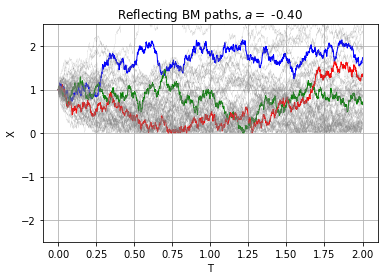

In [3]:
#------------------ The path visualization program ---------------------------------------------------

rng = default_rng()      # instantiate a bit generator

#    Parameters for the OU process being simulated

a   = -.4     # drift rate
X0  = 1.     # starting point for simulated paths
dt  = .001     # simulation time step size

PathPlotFile    = "PathPics.pdf"      # filename for a picture of some paths
DensityPlotFile = "OU_densities.pdf"  # filename for a PDF plots

#   Make a picture with a few paths

n_bold = 3                 # number of bold paths
n_soft = 50                # number of softer paths
T_f    = 2.                # simulate to this "fial" time

fig, ax = plt.subplots()     # Create a figure containing a single axes.

#   generate and plot the bold paths

X,T = path_sim( X0, n_bold, dt, T_f, a, rng)

bold_colors = ['blue', 'green', 'red']
for i in range(n_bold):
   ax.plot( T, X[i,:], linewidth = 1, color = bold_colors[i])
   
#   generate and plot the soft paths

X,T = path_sim( X0, n_soft, dt, T_f, a, rng)
for i in range(n_soft):
   ax.plot( T, X[i,:], linewidth = .1, color = 'gray')

plt.ylim( -2.5, 2.5)
plt.xlabel("T")
plt.ylabel("X")
title_string = r"Reflecting BM paths, $a=${a:6.2f}"
title_string = title_string.format(a=a)
plt.title(title_string)
plt.grid()
plt.savefig(PathPlotFile)                                    # save in the same directory
plt.show()

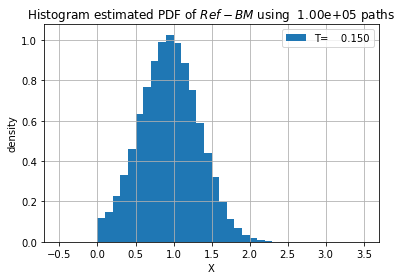

In [5]:
#------------------Main Program—PDF Visualization---------------------------------------------------
fig, ax = plt.subplots()     # Create a figure containing a single axes.

n_hist = 100000
n_bins = 40
X_hist = []
dt2=0.001
T2=0.15

X,T = path_sim( X0, n_hist, dt2, T2, a, rng) # simulation with small Δt
hist2 = "T={T3:9.3f}".format(T3=T2)

nn,nT = X.shape
X_hist.append( X[:,nT-1] )

ax.hist(X_hist, bins = n_bins, range = (-0.5, 3.5), density = True, label = hist2)
ax.legend()
ax.grid()
plt.xlabel("X")
plt.ylabel("density")
HistTitle = r'Histogram estimated PDF of $Ref-BM$ using{n_hist:10.2e} paths'
HistTitle = HistTitle.format(n_hist=n_hist)
plt.title(HistTitle)
plt.savefig(DensityPlotFile)
plt.show()

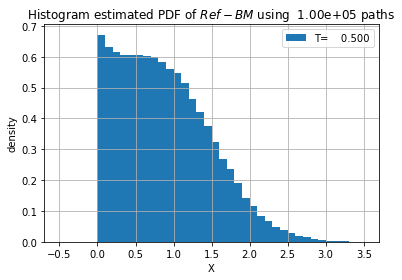

In [7]:
#------------------Main Program—PDF Visualization---------------------------------------------------
fig, ax = plt.subplots()     # Create a figure containing a single axes.

n_hist = 100000
n_bins = 40
X_hist = []
dt2=0.001
T2=.5

X,T = path_sim( X0, n_hist, dt2, T2, a, rng) # simulation with small Δt
hist2 = "T={T3:9.3f}".format(T3=T2)

nn,nT = X.shape
X_hist.append( X[:,nT-1] )

ax.hist(X_hist, bins = n_bins, range = (-0.5, 3.5), density = True, label = hist2)
ax.legend()
ax.grid()
plt.xlabel("X")
plt.ylabel("density")
HistTitle = r'Histogram estimated PDF of $Ref-BM$ using{n_hist:10.2e} paths'
HistTitle = HistTitle.format(n_hist=n_hist)
plt.title(HistTitle)
plt.savefig(DensityPlotFile)
plt.show()

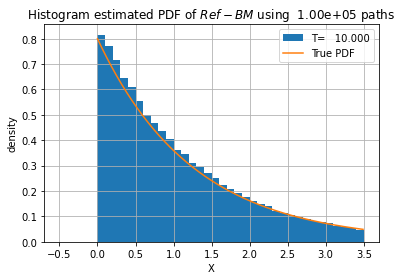

In [18]:
#------------------Main Program—PDF Visualization---------------------------------------------------
fig, ax = plt.subplots()     # Create a figure containing a single axes.

n_hist = 100000
n_bins = 40
X_hist = []
dt2=0.01
T2=10.

X,T = path_sim( X0, n_hist, dt2, T2, a, rng) # simulation with small Δt
hist2 = "T={T3:9.3f}".format(T3=T2)

nn,nT = X.shape
X_hist.append( X[:,nT-1] )

ax.hist(X_hist, bins = n_bins, range = (-0.5, 3.5), density = True, label = hist2)
ax.legend()
ax.grid()
plt.xlabel("X")
plt.ylabel("density")
HistTitle = r'Histogram estimated PDF of $Ref-BM$ using{n_hist:10.2e} paths'
HistTitle = HistTitle.format(n_hist=n_hist)
plt.title(HistTitle)
#x-axis ranges from dt2 and T2 with .001 steps
xspace = np.arange(0, 3.5, dt2)
label="True PDF"

def pdf(a,x):
    """the density at x of drifted Brownian Motion at equilibrium
    Arguments
    a:  (type = float) the drift rate
    x:  (type = float) the point on x-axis
   
    return: the probability density at x
    """    
    return (-2*a*np.exp(2*a*x)) #given by the formula

#plot the pdf formula
ax.plot(xspace,pdf(a,xspace),label=label)
ax.legend(loc='upper right')
plt.savefig(DensityPlotFile)
plt.show()

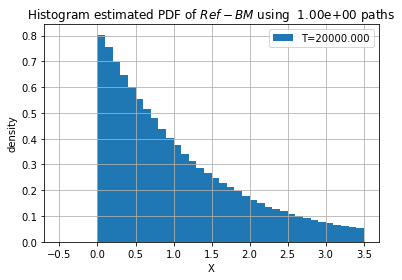

In [11]:
#------------------Main Program—PDF Visualization---------------------------------------------------
fig, ax = plt.subplots()     # Create a figure containing a single axes.

n_hist = 1
n_bins = 40
X_hist = []
dt2=0.01
T2=20000.

X,T = path_sim( X0, n_hist, dt2, T2, a, rng) # simulation with small Δt
hist2 = "T={T3:9.3f}".format(T3=T2)
X_hist.append( X[0,30:])

ax.hist(X_hist, bins = n_bins, range = (-0.5, 3.5), density = True, label = hist2)
ax.legend()
ax.grid()
plt.xlabel("X")
plt.ylabel("density")
HistTitle = r'Histogram estimated PDF of $Ref-BM$ using{n_hist:10.2e} paths'
HistTitle = HistTitle.format(n_hist=n_hist)
plt.title(HistTitle)
plt.savefig(DensityPlotFile)
plt.show()
